# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [ ]:

#Nombre: Barja Coragua Erlinda
#carrera: Ing.de Sistemas
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
# Librerias para graficar
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# Modulo de optimización de scipy
from scipy import optimize
from sklearn.model_selection import train_test_split
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si unapersona tiene diabetes  Suponga que unmedico desea determinar las posibilidades de Diabetes de cada paciente en función de sus resultados en dos exámenes. Tiene historial medico anteriores que puede usar como un conjunto dedatos para la regresión logística.
La siguiente celda cargará los datos y las etiquetas correspondientes:

In [ ]:

data = pd.read_csv('/content/sample_data/diabetes_prediction_dataset.csv', delimiter=',')
# X, y = data[:, 0:8], data[:, 8]
display(data)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
columnas_categoricas = data.select_dtypes(include=['object']).columns


In [ ]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])
#resultado
display(data)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [ ]:
X = data.iloc[:, :8]
y = data.iloc[:, 8]

m = y.size

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

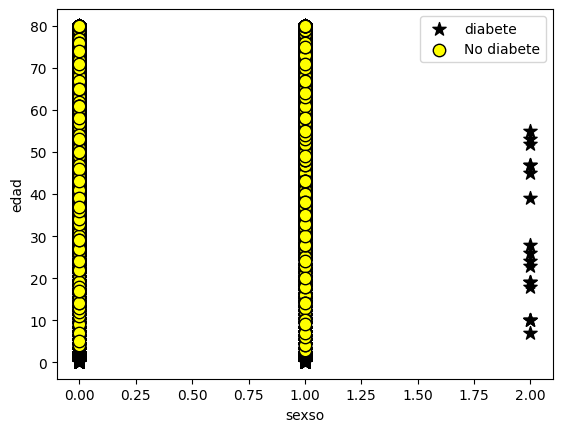

In [ ]:


def plotData(X, y):

    diabete = X[y == 0]
    no_diabete = X[y == 1]

    pyplot.scatter(diabete.iloc[:, 0], diabete.iloc[:, 1], marker='*', c='black', label='diabete', s=100)
    pyplot.scatter(no_diabete.iloc[:, 0], no_diabete.iloc[:, 1], marker='o', c='yellow', edgecolor='black', label='No diabete', s=80)


    pyplot.xlabel('sexso')
    pyplot.ylabel('edad')
    pyplot.legend()

    pyplot.show()

plotData(X, y)



In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [ ]:
def  featureNormalize(X):
    X_norm = X_train.copy()
    mu = np.zeros(X_train.shape[1])
    sigma = np.zeros(X_train.shape[1])

    mu = np.mean(X_train, axis = 0)
    sigma = np.std(X_train, axis = 0)
    X_norm = (X_train - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

In [ ]:

m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [ ]:
def calcularCosto(theta, X_train, y_train):

    m = y_train.size

    J = 0
    h = sigmoid(X_train.dot(theta.T))
    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))

    return J

In [ ]:
def descensoGradiente(theta, X_train, y_train, alpha, num_iters):
    # Inicializa algunos valores
    m = y_train.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta.T))
        theta = theta - (alpha / m) * (h - y_train).dot(X_train)

        J_history.append(calcularCosto(theta, X_train, y_train))
    return theta, J_history

In [ ]:
primera_fila = X_test.iloc[2]

# Imprimir la primera fila en forma de fila
for valor in primera_fila:
    print(valor, end=',')

0.0,5.0,0.0,0.0,0.0,18.49,4.5,85.0,

In [ ]:
def featureNormalizes(X):

    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X_norm = (X - mu) / sigma
    if isinstance(X, np.ndarray):
        X_norm = X_norm.values

    return X_norm, mu, sigma

X = np.array([0.0,5.0,0.0,0.0,0.0,18.49,4.5,85.0])

# Normalizar los datos
X_norm, mu, sigma = featureNormalizes(X)

print("Datos normalizados:\n", X_norm)

Datos normalizados:
           0
0 -0.481764
1 -0.311213
2 -0.481764
3 -0.481764
4 -0.481764
5  0.148934
6 -0.328268
7  2.417606


theta calculado por el descenso por el gradiente: [-1.81940534  0.03913355  0.21525794  0.13372949  0.12158673  0.05334429
  0.18110492  0.47028016  0.46784164]
El resultado entre falso o verdadero es (usando el descenso por el gradiente):0


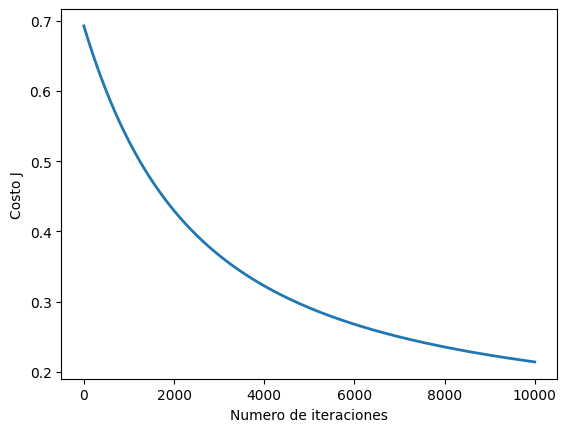

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1,-0.481764,-0.311213,-0.481764,-0.481764,-0.481764,0.148934,-0.328268,2.417606]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('El resultado entre falso o verdadero es (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [ ]:
print(X_test.shape)
print(theta)
m = X_test.shape[0]
print(m)

(20000, 8)
[-1.81940534  0.03913355  0.21525794  0.13372949  0.12158673  0.05334429
  0.18110492  0.47028016  0.46784164]
20000


In [ ]:
n=X_test.shape[1]
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

In [ ]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y_test.size

    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X_test.dot(theta.T))

    J = (1 / m) * np.sum(-y_test.dot(np.log(h+epsilon)) - (1 - y_test).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y_test).dot(X_test)

    return J, grad

In [ ]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Gradiente en theta inicial (zeros):')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}'.format(*grad))

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Gradiente en theta inicial (zeros):
	[0.41, 0.16, 15.73,0.02, 0.01, 0.85, 10.92,2.17


In [ ]:
test_theta = np.array([-0.4, 0.6, -1.3, 0.2, -0.5, 0.9, -1.4, 0.3, -0.6])

print(test_theta)
cost, grad = costFunction(test_theta, X_test, y_test)

print('Costo en theta prueba: {:.2f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}]'.format(*grad))


[-0.4  0.6 -1.3  0.2 -0.5  0.9 -1.4  0.3 -0.6]
Costo en theta prueba: 1.59
Gradiente en theta prueba:
	[-0.09, -0.04, -5.23,-0.02, -0.01, -0.24, -2.74,-0.60]


In [ ]:
options= {'maxiter': 1000}
res = optimize.minimize(costFunction,initial_theta,(X_test, y_test),jac=True,method='TNC',options=options)
cost = res.fun
theta = res.x

print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('theta:')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}]'.format(*theta))


<ipython-input-25-53a09a30e536>:2: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,initial_theta,(X_test, y_test),jac=True,method='TNC',options=options)


Costo con un valor de theta encontrado por optimize.minimize: 0.113
theta:
	[-27.91, 0.26, 0.04,0.92, 0.79, 0.12, 0.09,2.38]


In [ ]:
def predict(theta, X_test):

    m = X_test.shape[0]

    p = np.zeros(m)

    p = np.round(sigmoid(X_test.dot(theta.T)))
    return p

In [ ]:
prob = sigmoid(np.dot([1,0.0,5.0,0.0,0.0,0.0,18.49,4.5,85.0], theta))
print('Con estos datos la prediccion es: {:.0f}'.format(prob))

p = predict(theta, X_test)

print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_test) * 100))


Con estos datos la prediccion es: 0
Precisión de entrenamiento: 95.97 %
